# Exercise 4: Spectrograms

You are given a 10-minute long 12 5Hz signal that is mostly white noise, but also contains an added 60 Hz sinusoid for one minute. This 60 Hz sinusoid is known as “mains noise” because it is generated by the mains AC electricity that powers houses and buildings. In the US this AC frequency is at 60Hz. Plot the spectrogram of the signal to figure out in which minute the mains noise occurs. 

Then, remove the 60Hz noise by applying a bandpass filter with a pass band from 3 Hz to 20 Hz and plot the spectrogram again.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.signal

## Load Data

In [2]:
npz = np.load('./exercise4.npz')
sig = npz['signal']

## Bandpass Fitler

In [3]:
def BandpassFilter(signal, pass_band, fs):
    """Bandpass Filter.
    
    Args:
        signal: (np.array) The input signal
        pass_band: (tuple) The pass band. Frequency components outside 
            the two elements in the tuple will be removed.
        fs: (number) The sampling rate of <signal>
        
    Returns:
        (np.array) The filtered signal
    """
    b, a = sp.signal.butter(3, pass_band, btype='bandpass', fs=fs)
    return sp.signal.filtfilt(b, a, signal)

## Visualize signal

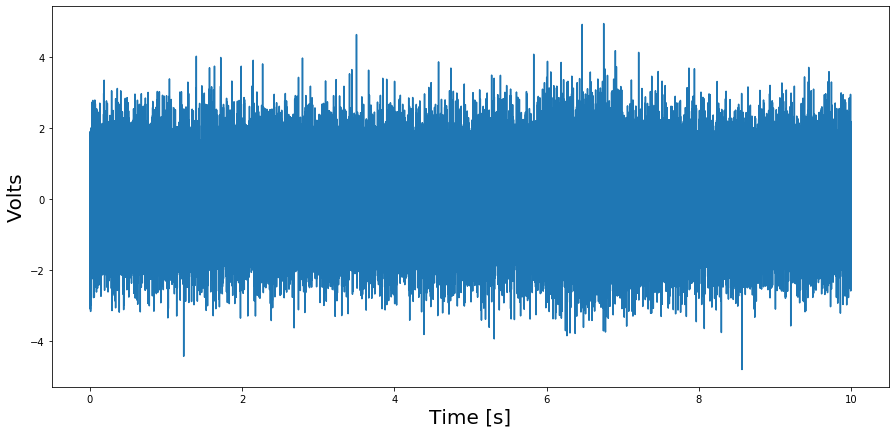

In [43]:
srate = 125
time = np.linspace(0, 10, len(sig))
plt.figure(figsize=(15,7))
plt.ylabel("Volts", fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.plot(time, sig);

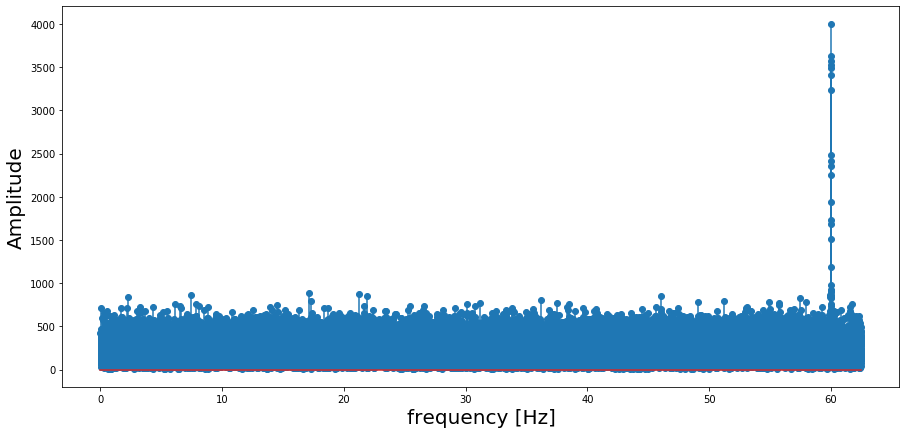

In [20]:
freqs = np.fft.rfftfreq(len(sig), 1./srate)
fourier_coeff = np.fft.rfft(sig)
plt.figure(figsize=(15,7))
plt.stem(freqs, abs(fourier_coeff), use_line_collection=True);
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("frequency [Hz]", fontsize=20);

## Plot the spectrogram

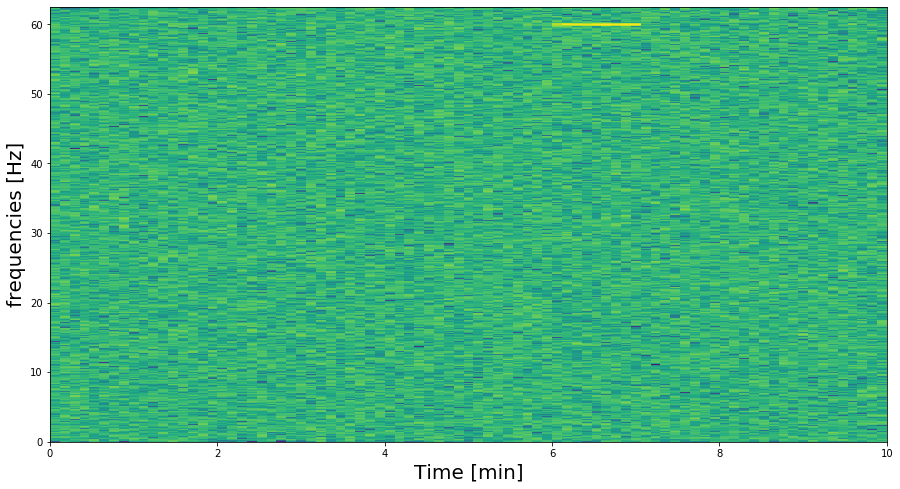

In [61]:
plt.figure(figsize=(15,8))
pxx,  freq, t, cax = plt.specgram(sig, NFFT=1000, Fs=srate, xextent=[0, 10]);
plt.xlabel('Time [min]', fontsize=20);
plt.ylabel('frequencies [Hz]', fontsize=20);

When does the 60 Hz noise show up? Give in a minute range (e.g., 5:00 to 6:00)
**TODO**

## Filter out the 60 Hz noise

In [47]:
filtered_sig = BandpassFilter(sig, (3,20), srate)

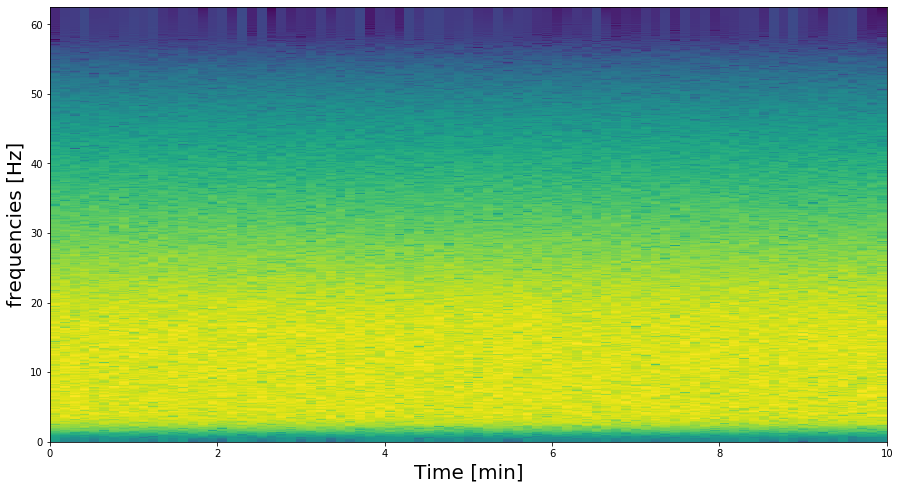

In [56]:
plt.figure(figsize=(15,8))
plt.specgram(filtered_sig, NFFT=1000, Fs=srate, xextent=[0, 10]);
plt.xlabel('Time [min]', fontsize=20);
plt.ylabel('frequencies [Hz]', fontsize=20);